# An Exploratory Topical Analysis of Obama's Speeches Utilizing Text Analysis Techniques and Data Visualizations
### By: Arvind Iyengar, Jiayi Huang, Parth Singhal

### Research Topic: 

Is the political interest of the administration in charge of the executive branch consistent with the actions of the legislative branch, specifically in regards to budget allocation? Furthermore, could a distance between the actions of the legislative branch and the agenda of the excecutive branch's administration be the result of the political affiliations of the two?

We will use Obama's administration to test the correlation between the content of Obama's speeches and Congress's actual national spending in particular areas over the 8-year span, and then specifically look at the differences during three time periods: 

1. 2009-2011: when the Democrats had majority control of both the House and the Senate
2. 2011-2015: when the Democrats had majority control of the Senate and the Republicans had majority control of the House
3. 2015-2016: when the Republicans had majority control of both the House and the Senate 

We will be comparing the consistency and correlation between Obama’s speeches and the national budget expenditure on 4 major national budget categories: National Defense, Education, Health Care, Employment / Social Security / Labor over the span of 2009 - 2016. Was the political interest of the Obama administration, expressed in Obama's speeches, consistent with the actions of the legislative branch during his two consecutive terms in regards to the allocation of the national budget as decided by Congress? To answer this question, we will compare the annual shift in the proportions of words in each category's, mentioned in Obama’s speeches, and the change in the corresponding proportions of national budget expenses for that category.

### Research Questions:

**Part 1**: Was the political interest of the Obama administration, expressed in Obama's speeches, consistent with the actions of the legislative branch during his two consecutive terms in regards to the allocation of the national budget as decided by Congress?

**Part 2**: If any inconsistency does exist between the agenda of the executive adminstration and the legislative branch, are the inconsistencies associated with a difference in the political affiliations of the two branches of government?

### Corpus:

We will be using a collection of speeches delivered by former President Barack Obama during years 2009 - 2016, as our corpus. Additionally, we will be using annual national budget data from the years 2009 - 2016. Our corpus is appropriate and consistent with our topic of research and analysis, since it is directly drawn from presidential speeches and national budget data from years 2009 - 2016.

### Methods: 

Dictionary (bag of words), nltk concatenating speeches by year and generate random samples from each year, type to token ratios, weighted importance. Visualizations include barcharts, histograms, and scatterplots. Computational text analysis methods make sense for this task as we will deal with large streams of data (speeches), and we want to look at the usage of 'bag of words' under specified categories. This requires counting occurences of each word along with its type-token ratio. Furthermore, combining speech data with budget data will also require integrating text as well as quantitative analysis techniques in our work.

### Plan of execution:

**Step 1**: Gathering corpus and budget expenses data.(Everyone)

**Step 2**: Critcially examining and creating bags of words for each of the 4 main categories.(Everyone)

**Step 3**: Cleaning the corpus, formatting it according to our requirements,  and putting it in a data frame with relevant columns. (Everyone)
        
#### Part 1:

**Step 4**: Group speeches by the year they were given and concatenate all the speeches within each period. Then tokenize each word and generate random samples of 10000 words from each year. (Arvind)

**Step 5**: Finding proportions of each word in a specified category and thus collecting proportion of their usage in presidential speeches, for each category. (Parth)

**Step 6**: Hypothesis testing: Compare the distribution of proportion of words under each category to the national budget data to see if there is any obvious relationship. Also use regression to see possible relationships. Possibly using scatterplots or lineplots to display the results. (Jiayi)

**Step 7**: Compare the findings to significant events that took place during Obama's adminsitration and see if those events affect the distribution of proportions of words in speeches and GDP expenditure. (Everyone)

**Step 8**: Conclusion for Research Question Part 1. (Everyone)

#### Part 2: If the inconsistency exists

**Step 9**: Group Obama's speeches by 3 time periods where there was a change in majority control of Congress.
1: 2009-2011: when the Democrats had majority control of both the House and the Senate
2. 2011-2015: when the Democrats had majority control of the Senate and the Republicans had majority control of the House
3. 2015-2016: when the Republicans had majority control of both the House and the Senate (Everyone)

**Step 10**: Hypothesis testing: Compare the distributions between the proportion of words under each category mentioned in Obama's speeches and the proportion of budget expenditure for each category for each of the 3 time periods. (Everyone)

**Step 11**: Conclusion for Research Question Part 2. (Everyone)


### Sources: 

Obama Speeches: 
http://www.americanrhetoric.com/barackobamaspeeches.htm

Federal budget grouped by categories: 
http://federal-budget.insidegov.com/l/119/2016#Spending&s=47xnQz

Budget Data:
https://obamawhitehouse.archives.gov/omb/budget/Historicals


### Hypothesis Testing: 

#### Likelihood-ratio test 

Null: The disrtibution of the proportion of words under each category found in Obama's speeches is the same as the distribution of the proportion of each category's GDP expenditure. Any deviation is due to chance. The political interest under Obama's administration expressed in the president's speech is consistent with Congress's actions in terms of expenditure.

Alternative: The distribution of the proportion of words under each category found in Obama's speeches is NOT the same as the distribution of the proportion of each category's budget expenditure. The difference is NOT due to chance, but in fact, other factors. The political interest under Obama's administration expressed in the president's speech is inconsistent with Congress's actions in terms of expenditure.

## Part 0: Preparation

In [2]:
!pip install requests

In [3]:
# Import packages
import pandas
import numpy as np
import os
import nltk
import requests
import string
from nltk.corpus import stopwords

from datetime import datetime
from datascience import *

from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.decomposition import LatentDirichletAllocation # for topic modeling
from sklearn.cluster import KMeans # for k-means clustering

from nltk.stem.porter import PorterStemmer # for stemming
import re

#for visualization
from scipy.spatial.distance import cosine
from sklearn.metrics import pairwise
from sklearn.manifold import MDS, TSNE

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

### Loading dataset.csv

The speeches dataset that is used in this notebook contains transcriptions of speeches given by President Obama between the years of 2009 and 2016 stored in `dataset.csv`, which was generated using a web scrapper. You must have `dataset.csv` in your current working directory for this code to work.

In [7]:
speeches = pandas.read_csv('dataset.csv').dropna(subset = ['Speeches'])
del speeches["Index"]
speeches

,Dates,Speeches
0,2009-01-08,Let me begin by thanking George Mason Universi...
1,2009-01-18,Hello America! I want to thank all the speake...
2,2009-01-20,[Chief Justice John G. Roberts administers th...
3,2009-01-24,click for pdfWe begin this year and this Admin...
4,2009-01-26,"Mr. Melhem: Mr. President, thank you for thi..."
5,2009-02-04,"Thank you, Tim, for your hard work on this iss..."
6,2009-02-09,"PRESIDENT OBAMA: Good evening, everybody. Ple..."
7,2009-02-12,"Thank you. Pease, be seated. Thank you, very..."
8,2009-02-24,"Madame Speaker, Mr. Vice President, Members o..."
9,2009-02-27,Thank you very much. To General Haley for the...


**Data Structure**: As we can see, our dataframe has three columns. The first one contains the date of each entry of speech given by Obama in the Date string format, the second one contains the actual speeches in strings as well. We have 402 speeches in total.

### Loading Budget Data

The national budget dataset that is used in this notebook contains budget data from 2009 to 2016, ordered by fiscal year, in `budget_data.xlsx`, which was found in a federal website. You must have `budget_data.xlsx` in your current working directory for this code to work.

While the data is loaded, we take a couple of pre-processing steps to create four distinct supercategories which will be described in a later part of this notebook. To do this, we made the following changes to the initial dataset:

- Combined National Defense and International Affairs to form 'National Defense' budget category.

- Combined Income Security, Social Security, and Veteran Affairs to form 'Employment' budget category.

- Combined Healthcare and Medicare to form 'Health' budget category.

We also added in the proportions (which is simply the total spending per category divided by the Total federal outlay) to make later calculations easier.

In [88]:
budget_data = pandas.read_excel("budget_data.xlsx", sep = '\t', encoding = 'utf-8', index_col=0)
budget_data = Table.from_df(budget_data.drop([budget_data.index[0]]).T)
budget_data['National Defense Overall'] = budget_data['National Defense'] + budget_data['International Affairs']
budget_data['Employment/Social_Security'] = budget_data['Income Security'] + budget_data['Social Security'] + budget_data['Veterans Benefits and Services']
budget_data['Health_Overall'] = budget_data['Health'] + budget_data['Medicare']
budget_data = budget_data.drop('Human resources', 'Health', 'Medicare', 'Income Security', 
                 'Social Security', '(On-budget)', '(Off-budget)', 'National Defense', 'International Affairs',
                              'Veterans Benefits and Services')
budget_data = budget_data.relabeled('Education, Training, Employment, and Social Services', 'Education')
budget_data = budget_data.relabeled('Health_Overall', 'Health')
budget_data = budget_data.relabeled('National Defense Overall', 'National Defense')
budget_data = budget_data.select(2, 4, 0, 3, 1)
budget_data['National Defense prop'] = budget_data['National Defense'] / budget_data['Total federal outlay']
budget_data['Employment prop'] = budget_data['Employment/Social_Security'] / budget_data['Total federal outlay']
budget_data['Education prop'] = budget_data['Education'] / budget_data['Total federal outlay']
budget_data['Health Care prop'] = budget_data['Health'] / budget_data['Total federal outlay']
budget_data = budget_data.with_column("Year", [i for i in range(2009, 2017)]).select(9,5,6,7,8,0,3,2,1,4)
budget_data

Year,National Defense prop,Employment prop,Education prop,Health Care prop,National Defense,Employment/Social_Security,Education,Health,Total federal outlay
2009,0.234187,0.372864,0.0226709,0.21731,823793,1.31162e+06,79749,764428,3.51768e+06
2010,0.250944,0.415765,0.0371985,0.237398,867533,1.43733e+06,128598,820704,3.45708e+06
2011,0.245597,0.403921,0.0280964,0.238175,884899,1.45535e+06,101233,858157,3.60306e+06
2012,0.242074,0.406912,0.0256783,0.231424,856205,1.43923e+06,90823,818535,3.53695e+06
2013,0.236956,0.431014,0.0210754,0.247823,818601,1.489e+06,72808,856141,3.45465e+06
2014,0.222602,0.431758,0.0258449,0.262723,780469,1.51379e+06,90615,921137,3.50611e+06
2015,0.205766,0.421966,0.0330942,0.278835,758924,1.55633e+06,122061,1.02842e+06,3.68829e+06
2016,0.201965,0.413989,0.028834,0.283748,798025,1.6358e+06,113932,1.12118e+06,3.95131e+06


**Data Structure**: As we can see, our cleaned, finalized table has only 5 columns: the first is the year and the remaining four are the proportions of the national budget put towards 4 different supercategories, as will be discussed in a later part of the notebook.

### Tokenizing Our Speeches

The following code tokenizes each speech and removes unnecessary tokens, such as stop words and tokens that contain numbers, that detract from identifying certain topics in our speeches. It then adds a column to the table that contains the tokenized versions of the speeches.

In [8]:
bad_tokens = list(string.punctuation) + ["...", "--"] + stopwords.words('English')

split_tokens = [nltk.word_tokenize(str(text).lower()) for text in speeches['Speeches']]
tokenized_speeches = []
for list_of_tokens in split_tokens:
    list_of_good_tokens = [token for token in list_of_tokens if token not in bad_tokens]
    list_of_good_tokens = [token for token in list_of_good_tokens if not any(char.isdigit() for char in token)]
    tokenized_speeches += [list_of_good_tokens]

speeches['Speeches Tokenized'] = [" ".join(text) for text in tokenized_speeches]

speeches

,Dates,Speeches,Speeches Tokenized
0,2009-01-08,Let me begin by thanking George Mason Universi...,let begin thanking george mason university ext...
1,2009-01-18,Hello America! I want to thank all the speake...,hello america want thank speakers performers t...
2,2009-01-20,[Chief Justice John G. Roberts administers th...,chief justice john g. roberts administers oath...
3,2009-01-24,click for pdfWe begin this year and this Admin...,click pdfwe begin year administration midst un...
4,2009-01-26,"Mr. Melhem: Mr. President, thank you for thi...",mr. melhem mr. president thank opportunity rea...
5,2009-02-04,"Thank you, Tim, for your hard work on this iss...",thank tim hard work issue economic recovery ec...
6,2009-02-09,"PRESIDENT OBAMA: Good evening, everybody. Ple...",president obama good evening everybody please ...
7,2009-02-12,"Thank you. Pease, be seated. Thank you, very...",thank pease seated thank much madam speaker le...
8,2009-02-24,"Madame Speaker, Mr. Vice President, Members o...",madame speaker mr. vice president members cong...
9,2009-02-27,Thank you very much. To General Haley for the...,thank much general haley outstanding work than...


------

## Part 1: Using Topic Modeling To Generate A Bag Of Words And Plotting The General Relevance Of Topics Throughout Obama's Presidency

### Applying Topic Modeling To Our Tokenized Speeches To Generate Bags Of Words

The following functions simplify the thought process that went behind implementing Latent-Dirchlet Allocation (a topic modeling algorithm) on the dataset. The functions are then applied to the dataset to produce a bag of words for relevant categories that are noticed in the federal budget and each bag of words generated is stored in the appropriate variable.

In [14]:
def print_top_words(model, feature_names, n_top_words):
    print("\nTopics in LDA model:")
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % int(int(topic_idx) ))
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

def return_top_words(model, feature_names, n_top_words):
    top_words = [[feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]] for topic_idx, topic in enumerate(model.components_)]
    print("Done!")
    return top_words

def vectorize_text(text, stop_words='english'):
    print("Extracting tf features for LDA...")
    if not stop_words:
        tf_vectorizer = CountVectorizer(max_df=0.80, min_df=50, max_features=None)
    else:
        tf_vectorizer = CountVectorizer(max_df=0.80, min_df=50, max_features=None, stop_words=stop_words)
    return tf_vectorizer.fit_transform(text.values.astype('U')), tf_vectorizer.get_feature_names()

def fit_lda_model(tf, num_samples, num_topics):   
    print("Fitting LDA models with tf features, "
          "using %d samples and %d topics..."
          % (num_samples, num_topics))
    lda = LatentDirichletAllocation(n_topics=num_topics, max_iter=20,
                                    learning_method='online',
                                    learning_offset=80.,
                                    total_samples=num_samples,
                                    random_state=0)
    lda.fit(tf)
    return lda

In [15]:
num_samples = 10000
num_topics = 6
num_top_words = 50

tf, tf_feature_names = vectorize_text(speeches['Speeches Tokenized'])
lda = fit_lda_model(tf, num_samples, num_topics)
top_words = return_top_words(lda, tf_feature_names, num_top_words)

Extracting tf features for LDA...
Fitting LDA models with tf features, using 10000 samples and 6 topics...
Done!


In [16]:
national_defense_words = top_words[0]
print(national_defense_words)

['iran', 'nuclear', 'security', 'israel', 'international', 'deal', 'weapons', 'sanctions', 'peace', 'government', 'intelligence', 'program', 'nations', 'region', 'war', 'weapon', 'community', 'clear', 'regime', 'place', 'military', 'allies', 'congress', 'state', 'continue', 'support', 'use', 'prevent', 'countries', 'national', 'partners', 'east', 'including', 'fact', 'peaceful', 'forward', 'actions', 'believe', 'issues', 'issue', 'minister', 'review', 'arms', 'efforts', 'action', 'resolve', 'prime', 'agreement', 'resolution', 'interests']


In [17]:
employment_words = top_words[1]
print(employment_words)

['jobs', 'economy', 'energy', 'businesses', 'future', 'companies', 'tax', 'financial', 'plan', 'economic', 'year', 'reform', 'crisis', 'nation', 'business', 'oil', 'workers', 'clean', 'help', 'deficit', 'growth', 'dollars', 'government', 'families', 'investments', 'health', 'spending', 'recovery', 'money', 'cuts', 'budget', 'industry', 'small', 'debt', 'create', 'education', 'long', 'pay', 'credit', 'means', 'care', 'century', 'cut', 'reforms', 'responsibility', 'invest', 'ca', 'll', 'believe', 'private']


In [18]:
education_words = top_words[2]
print(education_words)

['education', 'school', 'students', 'schools', 'college', 'teachers', 'children', 'child', 'high', 'student', 'parents', 'success', 'skills', 'community', 'standards', 'nation', 'learning', 'job', 'learn', 'century', 'training', 'future', 'responsibility', 'help', 'life', 'early', 'degree', 'year', 'earn', 'day', 'young', 'matter', 'class', 'dream', 'succeed', 'washington', 'science', 'quality', 'achievement', 'promise', 'means', 'prepare', 'outstanding', 'programs', 'chance', 'unless', 'career', 'best', 'opportunities', 'higher']


In [19]:
health_care_words = top_words[3]
print(health_care_words)

['think', 'got', 'health', 'care', 'sure', 'lot', 'obama', 'question', 'things', 'better', 'everybody', 'insurance', 'thing', 'folks', 'making', 'll', 'congress', 'really', 'law', 'job', 'government', 'year', 'able', 'ca', 'look', 'working', 'help', 'getting', 'mr', 'hard', 'important', 'republicans', 'house', 'fact', 'actually', 'big', 'little', 'economy', 'long', 'day', 'kids', 'jobs', 'percent', 'money', 'families', 'start', 'point', 'place', 'state', 'republican']


In [20]:
intl_affairs_words = top_words[4]
print(intl_affairs_words)

['think', 'countries', 'question', 'democracy', 'young', 'obama', 'russia', 'important', 'continue', 'change', 'believe', 'look', 'rights', 'future', 'progress', 'nations', 'global', 'government', 'sure', 'political', 'human', 'great', 'issues', 'better', 'able', 'things', 'trade', 'leaders', 'll', 'values', 'europe', 'mr', 'opportunity', 'women', 'international', 'security', 'help', 'respect', 'history', 'different', 'region', 'strong', 'policy', 'support', 'everybody', 'democratic', 'africa', 'society', 'true', 'feel']


In [21]:
veteran_affairs_words = top_words[5]
print(veteran_affairs_words)

['nation', 'war', 'military', 'life', 'isil', 'men', 'women', 'iraq', 'god', 'lives', 'families', 'day', 'forces', 'security', 'home', 'troops', 'terrorists', 'afghanistan', 'love', 'children', 'faith', 'al', 'history', 'freedom', 'service', 'help', 'support', 'family', 'great', 'government', 'stand', 'nations', 'best', 'peace', 'power', 'including', 'man', 'justice', 'honor', 'long', 'force', 'fight', 'terrorist', 'qaeda', 'young', 'bless', 'veterans', 'change', 'better', 'protect']


### Topic Modeling Algorithm Results:

Although the results produced are notably random, due to our large sample size we tend to notice that the results converge on the following 6 topics associated with our National Budget:

1) National Defense

2) Employment

3) Education

4) Health Care

5) International Affairs

6) Veteran Affairs

However, we also note that, in terms of budget, International Affairs tends to be associated with National Defense and Veteran Affairs is assocaited with Employment (due to Social Security incorporating both of these aspects). Therefore, as shown in later parts of this project, we will combine these categories with each other.

### Visualizing The Relevance Of Topics Over Obama's Entire Presidency

The following code concatenates every speech together and then checks the number of times a word from the concatencated speeches are in a particular category for all categories that our topic modeling algorithm picked up on. Then, as described above, we combine the Veteran Affairs and Employment categories and the National Defense and International Affairs categories to come up with four supercategories associated with our budget. Finally, we normalize the word counts to come up with the proportion of all speeches associated with each of our topics, which we use as a measure of relevance of each topic over the course of Obama's Entire Presidency.

Categories,Number of Words,Proportion
National Defense,77254,0.348857
Employment,70682,0.31918
Education,22394,0.101125
Health Care,51119,0.230839


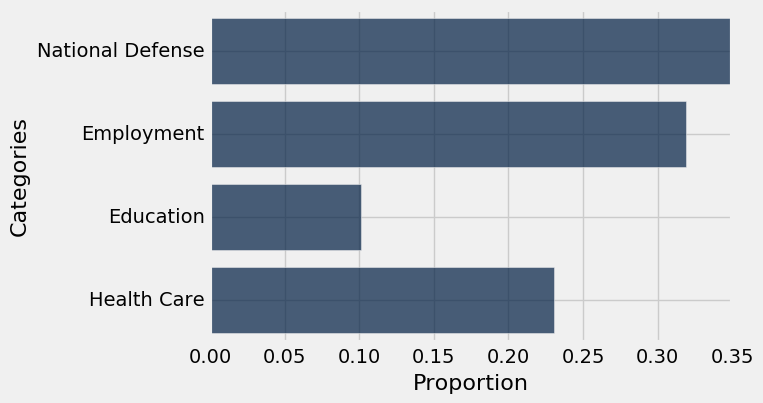

In [27]:
all_speeches_wo_stopwords = (" ".join([word for word in speeches["Speeches Tokenized"]])).split()
num_words_in_national_defense = len([word for word in all_speeches_wo_stopwords if word in national_defense_words])
num_words_in_employment = len([word for word in all_speeches_wo_stopwords if word in employment_words])
num_words_in_education = len([word for word in all_speeches_wo_stopwords if word in education_words])
num_words_in_healthcare = len([word for word in all_speeches_wo_stopwords if word in health_care_words])
num_words_in_intl = len([word for word in all_speeches_wo_stopwords if word in intl_affairs_words])
num_words_in_veteran = len([word for word in all_speeches_wo_stopwords if word in veteran_affairs_words])
category_count = Table().with_columns(
    'Categories', 
    make_array('National Defense',  'Employment', 'Education', 'Health Care'),
    'Number of Words',
    make_array(num_words_in_national_defense+num_words_in_intl, 
               num_words_in_employment+num_words_in_veteran, num_words_in_education, 
              num_words_in_healthcare)
)
category_summary = category_count.with_column('Proportion', category_count['Number of Words']/sum(category_count.column("Number of Words")))
category_summary.show()
category_summary.barh("Categories", "Proportion")

### Findings:

We see that National Defense is referred to the most, followed by Employment, Education, and Health Care. As we will see in a later part of this notebook, this is the same order of prevalence put towards these categories in the national budget, so we can see that this analysis is going in the right direction.

------------

### Visualizing The Relevance Of Topics Each Fiscal Year Of Obama's Presidency And Comparing To Budget

The following code creates a new table, df_w_topics, that utilizes the output of the LDA algorithm and the original speeches from the speeches dataset to plot the relevance of topics over each fiscal year of Obama's presidency. We first use the date the speech was given to categorize each speech by its fiscal year and then find the mean relevance of the topic over each fiscal year. This creates a table with an identical structure as the first five columns of our budget table (after the data cleaning done during the preparation step). We then use this information to plot the relevance of topics over time in Obama's speeches against the actual budget data.

In [90]:
categories = [
    'National Defense',
    'Employment',
    'Education',
    'Health Care',
    'International Affairs',
    'Veteran Affairs'
]

topic_dist = lda.transform(tf)
topic_dist_df = pandas.DataFrame(topic_dist)
df_w_topics = topic_dist_df.join(speeches)
df_w_topics.columns = categories + list(df_w_topics.columns[6:])
    
df_w_topics = df_w_topics[pandas.notnull(df_w_topics['Dates'])]

fiscal_year = np.array([])
for date in  df_w_topics["Dates"]:
    year, month = int(date[:4]), int(date[5:7])
    if month >= 10:
        year += 1
    fiscal_year = np.append(fiscal_year, year)

df_w_topics["Dates"] = fiscal_year.astype(int)

# We remove dates associated with the fiscal year 2017 since Obama's presidency stops before it
df_w_topics = df_w_topics[df_w_topics["Dates"] != 2017]

df_w_topics.columns = [str(i) for i in df_w_topics.columns]
df_w_topics = Table.from_df(df_w_topics).relabeled("Dates", "Year")

norm_topic_relevance = df_w_topics.select(categories).apply(lambda row: list(row) / sum(list(row)))
norm_columns = [np.array([row[i] for row in norm_topic_relevance]) for i in range(len(norm_topic_relevance[0]))]
grouped_columns = [
    norm_columns[0] + norm_columns[4], 
    norm_columns[1] + norm_columns[5], 
    norm_columns[2], 
    norm_columns[3]
]

labels = categories[:4]
for label, column in zip(labels, grouped_columns):
    df_w_topics = df_w_topics.with_column(label, column)
    
prev_topics = df_w_topics.select(["Year"] + labels).group("Year", np.mean)

prev_topics.show()
budget_data.select(0,1,2,3,4).show()

Year,National Defense mean,Employment mean,Education mean,Health Care mean
2009,0.204423,0.564619,0.0326247,0.198333
2010,0.151898,0.556334,0.0268139,0.264955
2011,0.200403,0.553717,0.0121533,0.233727
2012,0.148673,0.596877,0.00426268,0.250187
2013,0.122074,0.459443,0.0117568,0.406726
2014,0.328809,0.391757,0.00155807,0.277876
2015,0.30705,0.368281,0.00994361,0.314726
2016,0.330559,0.388915,0.00770964,0.272817


Year,National Defense prop,Employment prop,Education prop,Health Care prop
2009,0.234187,0.372864,0.0226709,0.21731
2010,0.250944,0.415765,0.0371985,0.237398
2011,0.245597,0.403921,0.0280964,0.238175
2012,0.242074,0.406912,0.0256783,0.231424
2013,0.236956,0.431014,0.0210754,0.247823
2014,0.222602,0.431758,0.0258449,0.262723
2015,0.205766,0.421966,0.0330942,0.278835
2016,0.201965,0.413989,0.028834,0.283748


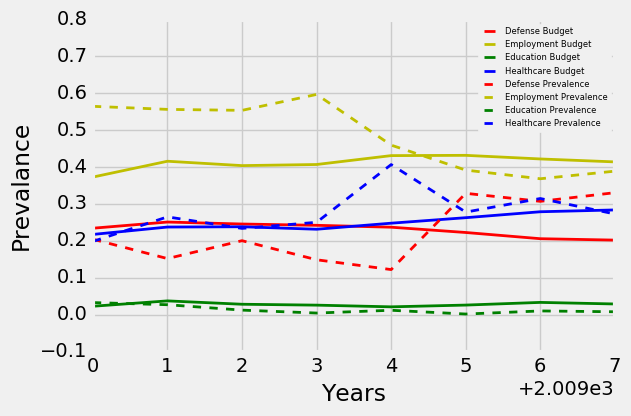

In [91]:
plt.ylim(0, 0.5)
plt.plot(budget_data['Year'], budget_data['National Defense prop'], lw=2, label='Defense Budget', color="r")
plt.plot(budget_data['Year'], budget_data['Employment prop'], lw=2, label='Employment Budget', color="y")
plt.plot(budget_data['Year'], budget_data['Education prop'], lw=2, label='Education Budget', color="g")
plt.plot(budget_data['Year'], budget_data['Health Care prop'], lw=2, label='Healthcare Budget', color="b")
plt.xlabel('Years')
plt.ylabel('Proportion of budget')
plt.ylim(0, 0.6)
plt.legend(prop={'size':8});

plt.ylim(0, 0.5)
plt.plot(prev_topics['Year'], prev_topics['National Defense mean'], '--', lw=2, label='Defense Prevalence', color="r")
plt.plot(prev_topics['Year'], prev_topics['Employment mean'], '--', lw=2, label='Employment Prevalence', color="y")
plt.plot(prev_topics['Year'], prev_topics['Education mean'], '--', lw=2, label='Education Prevalence', color="g")
plt.plot(prev_topics['Year'], prev_topics['Health Care mean'], '--', lw=2, label='Healthcare Prevalence', color="b")
plt.xlabel('Years')
plt.ylabel('Prevalance')
plt.ylim(-0.1, 0.8)
plt.legend(prop={'size':6});

### Findings


In [100]:
speeches['Year'] = np.array(speeches['Dates'].apply(lambda x: x[:4]))
part1_table = Table().from_df(speeches)
part1_table = part1_table.drop(0, 1)
part1_table = part1_table.group("Year", ",".join)
temp = part1_table.to_df()
temp['Speeches Words'] = np.array(temp['Speeches Tokenized join'].apply(lambda x: x.split()))
temp['Year'] = np.array(temp['Year'].apply(lambda x: int(x)))
test_data = Table().from_df(temp)
test_data["Word Count"] = [len(doc) for doc in test_data["Speeches Words"]]
final_data = test_data.join('Year', budget_data, 'Year').drop(1)
national_defense_word_prop, education_word_prop, healthcare_word_prop, employment_word_prop = [], [], [], []
for year in range(final_data.num_rows):
    words = final_data['Speeches Words'][year]
    num_words_national_defense = len([word for word in words if word in national_defense_words])
    num_words_education = len([word for word in words if word in education_words])
    num_words_healthcare = len([word for word in words if word in health_care_words])
    num_words_employment = len([word for word in words if word in employment_words])
    total_number = num_words_national_defense + num_words_education + num_words_healthcare + num_words_employment
    national_defense_word_prop += [num_words_national_defense / total_number]
    education_word_prop += [num_words_education / total_number]
    healthcare_word_prop += [num_words_healthcare / total_number]
    employment_word_prop += [num_words_employment / total_number]
observation_table = Table().with_columns('Year', np.arange(2009, 2017),
                                         'National defense word prop',  national_defense_word_prop,
                                         'Education word prop', education_word_prop,
                                         'Health Care word prop', healthcare_word_prop,
                                         'Employment word prop', employment_word_prop).join('Year', budget_data.select(0,1,2,3,4), 'Year')
observation_table = observation_table.select(0,1,4,2,3,5,6,7,8)
observation_table

Year,National defense word prop,Employment word prop,Education word prop,Health Care word prop,National Defense prop,Employment prop,Education prop,Health Care prop
2009,0.209949,0.305924,0.188744,0.295383,0.234187,0.372864,0.0226709,0.21731
2010,0.173477,0.29676,0.151162,0.378601,0.250944,0.415765,0.0371985,0.237398
2011,0.226314,0.305255,0.184272,0.284159,0.245597,0.403921,0.0280964,0.238175
2012,0.191756,0.29353,0.166572,0.348142,0.242074,0.406912,0.0256783,0.231424
2013,0.209533,0.221598,0.155776,0.413093,0.236956,0.431014,0.0210754,0.247823
2014,0.27788,0.186784,0.142191,0.393145,0.222602,0.431758,0.0258449,0.262723
2015,0.286404,0.183173,0.166744,0.363679,0.205766,0.421966,0.0330942,0.278835
2016,0.23552,0.182732,0.157502,0.424246,0.201965,0.413989,0.028834,0.283748


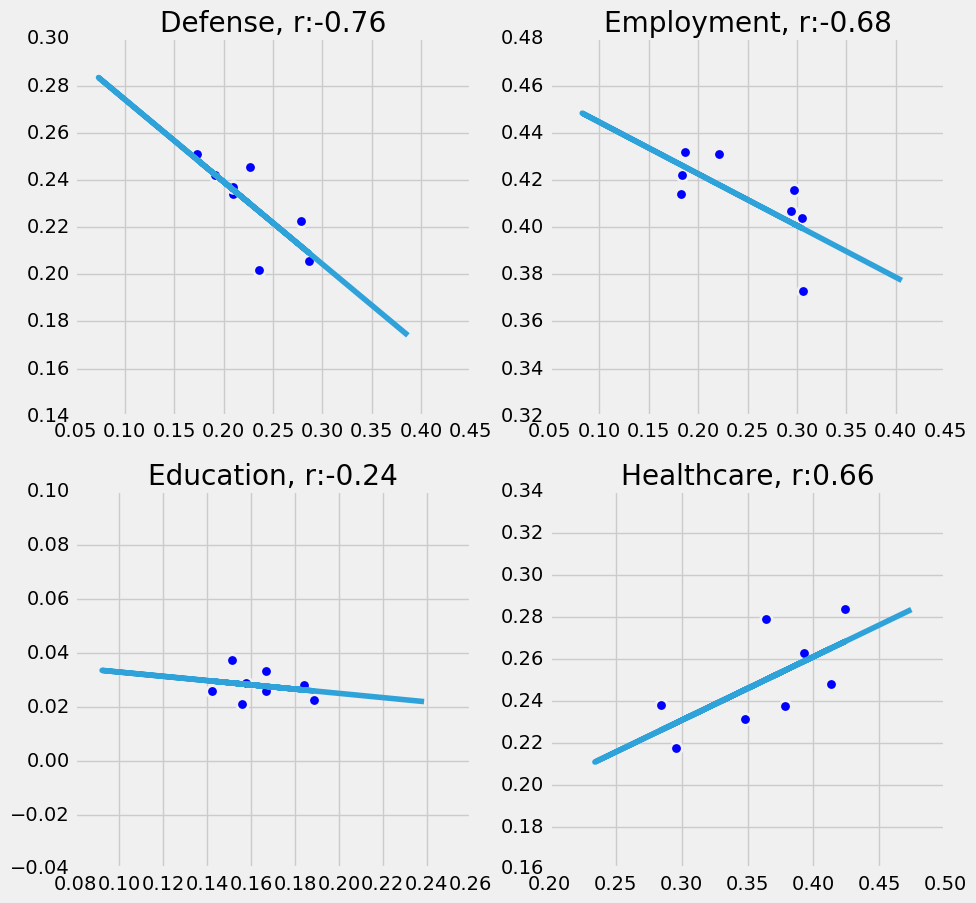

In [101]:
def corr_coefficient(table, column_X, column_Y):
    x = table.column(column_X)
    y = table.column(column_Y)
    x_su = (x-np.mean(x))/np.std(x)
    y_su = (y-np.mean(y))/np.std(y)
    return np.mean(x_su*y_su)

ff, pp = plt.subplots(2, 2)
pp[0, 0].scatter(observation_table[1], observation_table[5], lw=2, label='Defense', s=70)
m1, b1 = np.polyfit(observation_table[1], observation_table[5], 1)
pp[0, 0].plot(np.append(observation_table[1], [min(observation_table[1])-0.1, max(observation_table[1])+0.1]), 
              m1*(np.append(observation_table[1], [min(observation_table[1])-0.1, max(observation_table[1])+0.1])) + b1,
              '-')
r1 = round(corr_coefficient(observation_table, 1, 5),2)
pp[0, 0].set_title('Defense, r:' + str(r1))


pp[0, 1].scatter(observation_table[2], observation_table[6], lw=2, label='Employment', s=70)
m2, b2 = np.polyfit(observation_table[2], observation_table[6], 1)
pp[0, 1].plot(np.append(observation_table[2], [min(observation_table[2])-0.1, max(observation_table[2])+0.1]), 
              m2*(np.append(observation_table[2], [min(observation_table[2])-0.1, max(observation_table[2])+0.1])) + b2, 
              '-')
r2 = round(corr_coefficient(observation_table, 2, 6),2)
pp[0, 1].set_title('Employment, r:' + str(r2))


pp[1, 0].scatter(observation_table[3], observation_table[7], lw=2, label='Education', s=70)
m3, b3 = np.polyfit(observation_table[3], observation_table[7], 1)
pp[1, 0].plot(np.append(observation_table[3], [min(observation_table[3])-0.05, max(observation_table[3])+0.05]), 
              m3*(np.append(observation_table[3], [min(observation_table[3])-0.05, max(observation_table[3])+0.05])) + b3, 
              '-')
r3 = round(corr_coefficient(observation_table, 3, 7), 2)
pp[1, 0].set_title('Education, r:' + str(r3))


pp[1, 1].scatter(observation_table[4], observation_table[8], lw=2, label='Healthcare', s=70)
m4, b4 = np.polyfit(observation_table[4], observation_table[8], 1)
pp[1, 1].plot(np.append(observation_table[4], [min(observation_table[4])-0.05, max(observation_table[4])+0.05]), 
              m4*(np.append(observation_table[4], [min(observation_table[4])-0.05, max(observation_table[4])+0.05])) + b4,
              '-')
r4 = round(corr_coefficient(observation_table, 4, 8),2)
pp[1, 1].set_title('Healthcare, r:' + str(r4))
ff.set_figheight(10)
ff.set_figwidth(10)
plt.show();

# Hypothesis Testing (Part 1):

**Null**: The disrtibution of the proportion of words under each category found in Obama's speeches is the same as the distribution of the proportion of each category's GDP expenditure for each year. Any deviation is due to chance. The political interest under Obama's administration expressed in the president's speech is consistent with Congress's actions in terms of expenditure. **Average Total Difference = 0**. 

**Alternative**: The distribution of the proportion of words under each category found in Obama's speeches is NOT the same as the distribution of the proportion of each category's budget expenditure for each year. The difference is NOT due to chance, but in fact, other factors. The political interest under Obama's administration expressed in the president's speech is inconsistent with Congress's actions in terms of expenditure. **Average Total Difference != 0**.

**Test Statistic**: Average total difference between the annual word proportions and budget proportions of the 4 categories.

[0.12644612333016533, 0.20930595402571486]

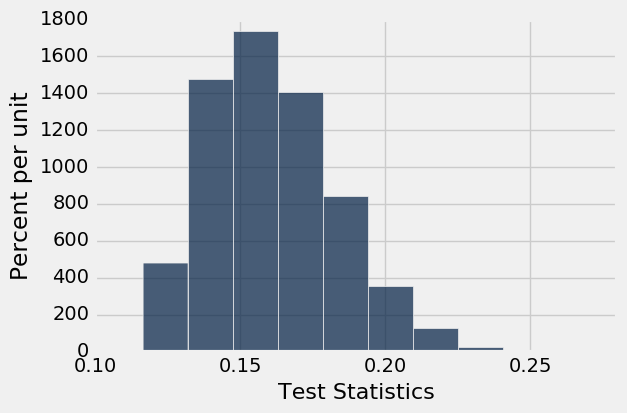

In [103]:
def diff_prop(table, word_prop_col, budget_prop_col):
    word_prop = table.column(word_prop_col)
    budget_prop = table.column(budget_prop_col)
    return np.sum(word_prop - budget_prop)

def test_statistic(table):
    nd_diff_prop = diff_prop(table, 1, 5)
    em_diff_prop = diff_prop(table, 2, 6)
    ed_diff_prop = diff_prop(table, 3, 7)
    hc_diff_prop = diff_prop(table, 4, 8)
    return np.average(make_array(nd_diff_prop, ed_diff_prop, hc_diff_prop, em_diff_prop))

# bootstrap
test_statistics = []
for trial in range(3000):
    new_sample = observation_table.sample()
    test_statistics += [test_statistic(new_sample)]
Table().with_column('Test Statistics', test_statistics).hist()
[np.percentile(test_statistics, 2.5), np.percentile(test_statistics, 97.5)]

## Conclusion: 

Since 0 is not contained in the 95% confidence interval, we reject the null and conclude that the distribution of the proportion of words under each category found in Obama's speeches is NOT the same as the distribution of the proportion of each category's budget expenditure for each year. The difference is NOT due to chance, but in fact, other factors. The political interest under Obama's administration expressed in the president's speech is inconsistent with Congress's actions in terms of expenditure.

## One Step Further

Since we see that there is a discrepancy in the proportions of words and budget for the 4 categories combined, we want to whether there is a discrepancy (dependency) in each individual category. We will conduct a hypothesis testing for each category.

For each category, the hypotheses are the same:

**Null**: There is no linear correlation between the disrtibution of the proportion of words under the category found in Obama's speeches and the distribution of the proportion of the category's GDP expenditure for each year. The two proportion distributions are independent. Any deviation is due to chance. For this category, the political interest under Obama's administration expressed in the president's speech is independent of Congress's actions in terms of expenditure. **Correlation Coefficient (r) = 0**. 

**Alternative**: There is a linear correlation between the disrtibution of the proportion of words under the category found in Obama's speeches and the distribution of the proportion of the category's GDP expenditure for each year. The two proportion distributions are not independent. Any deviation is NOT due to chance. For this category, the political interest under Obama's administration expressed in the president's speech is dependent of Congress's actions in terms of expenditure. **Correlation Coefficient (r) != 0**.

**Test Statistic**: Correlation Coefficient (r)

### National Defense

[-0.99058780124662538, -0.42630751395300759]

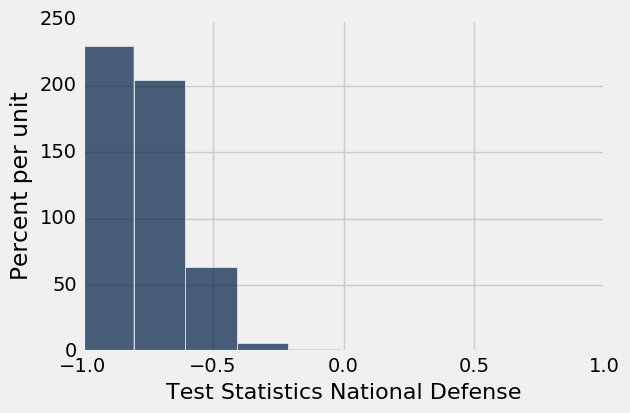

In [106]:
# bootstrap
test_statistics_nd = []
for trial in range(3000):
    new_sample_nd = observation_table.select(1,5).sample()
    test_statistics_nd += [corr_coefficient(new_sample_nd, 0, 1)]
Table().with_column('Test Statistics National Defense', test_statistics_nd).hist()
[np.percentile(test_statistics_nd, 2.5), np.percentile(test_statistics_nd, 97.5)]

### Conclusion for National Defense: 

Since 0 is not contained in the 95% confidence interval, we reject the null and conclude that there **is** a linear correlation between the disrtibution of the proportion of words under National Defense found in Obama's speeches and the distribution of the proportion of National Defense's GDP expenditure for each year. The two proportion distributions are not independent. Any deviation is NOT due to chance. **For National Defense, the political interest under Obama's administration expressed in the president's speech is dependent of Congress's actions in terms of expenditure.**

### Employment

[-0.92738714858000426, -0.36561220428042718]

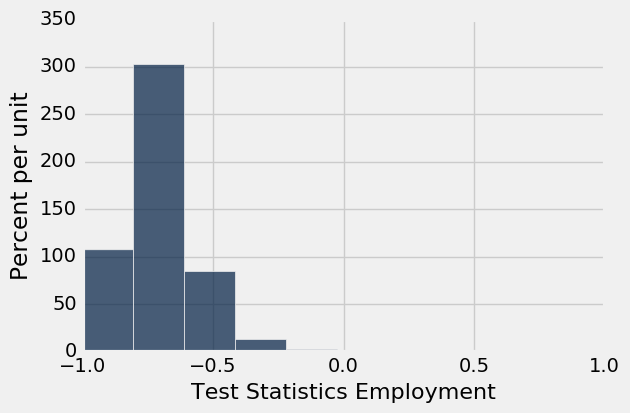

In [109]:
# bootstrap
test_statistics_ep = []
for trial in range(3000):
    new_sample_ep = observation_table.select(2,6).sample()
    test_statistics_ep += [corr_coefficient(new_sample_ep, 0, 1)]
Table().with_column('Test Statistics Employment', test_statistics_ep).hist()
[np.percentile(test_statistics_ep, 2.5), np.percentile(test_statistics_ep, 97.5)]

### Conclusion for Employment: 

Since 0 is not contained in the 95% confidence interval, we reject the null and conclude that there **is** a linear correlation between the disrtibution of the proportion of words under Employment found in Obama's speeches and the distribution of the proportion of Employment's GDP expenditure for each year. The two proportion distributions are not independent. Any deviation is NOT due to chance. **For Employment, the political interest under Obama's administration expressed in the president's speech is dependent of Congress's actions in terms of expenditure.**

### Education

[-0.84421158158303544, 0.48187400885875015]

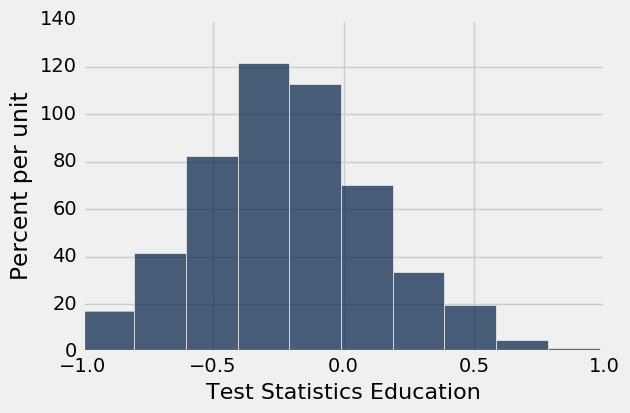

In [110]:
# bootstrap
test_statistics_ed = []
for trial in range(3000):
    new_sample_ed = observation_table.select(3,7).sample()
    test_statistics_ed += [corr_coefficient(new_sample_ed, 0, 1)]
Table().with_column('Test Statistics Education', test_statistics_ed).hist()
[np.percentile(test_statistics_ed, 2.5), np.percentile(test_statistics_ed, 97.5)]

### Conclusion for Education: 

Since 0 is contained in the 95% confidence interval, we **fail to reject** the null and conclude that there **is not** a linear correlation between the disrtibution of the proportion of words under Education found in Obama's speeches and the distribution of the proportion of Education's GDP expenditure for each year. The two proportion distributions are independent. Any deviation is due to chance. **For Education, the political interest under Obama's administration expressed in the president's speech is independent of Congress's actions in terms of expenditure.**

### Healthcare

[0.14311636580694695, 0.92537781876791025]

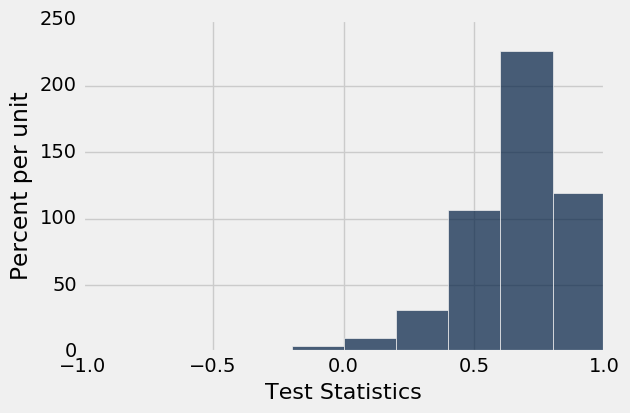

In [112]:
# bootstrap
test_statistics_hc = []
for trial in range(3000):
    new_sample_hc = observation_table.select(4,8).sample()
    test_statistics_hc += [corr_coefficient(new_sample_hc, 0, 1)]
Table().with_column('Test Statistics', test_statistics_hc).hist()
[np.percentile(test_statistics_hc, 2.5), np.percentile(test_statistics_hc, 97.5)]

### Conclusion for Healthcare: 

Since 0 is not contained in the 95% confidence interval, we reject the null and conclude that there **is** a linear correlation between the disrtibution of the proportion of words under Healthcare found in Obama's speeches and the distribution of the proportion of Healthcare's GDP expenditure for each year. The two proportion distributions are not independent. Any deviation is NOT due to chance. **For Healthcare, the political interest under Obama's administration expressed in the president's speech is dependent of Congress's actions in terms of expenditure.**

## Findings:

From our results of Hypothesis Testing, we see that besides Education, there is a some sort of overall consistency between the proportions of words and budget for the following categories:

- National Defense
- Employment
- Healthcare



# PART 2

In [116]:
final_data

Year,Speeches Words,Word Count,National Defense prop,Employment prop,Education prop,Health Care prop,National Defense,Employment/Social_Security,Education,Health,Total federal outlay
2009,"['let', 'begin', 'thanking', 'george', 'mason', 'univers ...",79069,0.234187,0.372864,0.0226709,0.21731,823793,1.31162e+06,79749,764428,3.51768e+06
2010,"['concluded', 'meeting', 'members', 'national', 'securit ...",83716,0.250944,0.415765,0.0371985,0.237398,867533,1.43733e+06,128598,820704,3.45708e+06
2011,"['thank', 'please', 'please', 'seated', 'families', ""'ve ...",66732,0.245597,0.403921,0.0280964,0.238175,884899,1.45535e+06,101233,858157,3.60306e+06
2012,"['good', 'morning', 'everybody', 'united', 'states', 'am ...",49919,0.242074,0.406912,0.0256783,0.231424,856205,1.43923e+06,90823,818535,3.53695e+06
2013,"['please', 'seat', 'everybody', 'good', 'morning', 'thou ...",84046,0.236956,0.431014,0.0210754,0.247823,818601,1.489e+06,72808,856141,3.45465e+06
2014,"['dawn', 'republic', 'small', 'secret', 'surveillance', ...",75955,0.222602,0.431758,0.0258449,0.262723,780469,1.51379e+06,90615,921137,3.50611e+06
2015,"['happy', 'new', 'year', 'everybody', 'fired', 'year', ' ...",129813,0.205766,0.421966,0.0330942,0.278835,758924,1.55633e+06,122061,1.02842e+06,3.68829e+06
2016,"['anderson', 'cooper', 'good', 'evening', 'george', 'mas ...",141518,0.201965,0.413989,0.028834,0.283748,798025,1.6358e+06,113932,1.12118e+06,3.95131e+06


In [123]:
periods_table = final_data.select(0,1,7,8,9,10,11)
periods_table['Period'] = [1, 1, 1, 2, 2, 2, 3, 3]
period1 = final_data.where('Year', are.between_or_equal_to(2009, 2011))
period2 = final_data.where('Year', are.between_or_equal_to(2012, 2014))
period3 = final_data.where('Year', are.between_or_equal_to(2015, 2016))
period1_speeches, period2_speeches, period3_speeches= [], [], []
for i in range(3):
    period1_speeches = np.append(period1_speeches, period1.column(1)[i])
    period2_speeches = np.append(period2_speeches, period2.column(1)[i])
for i in range(2):
    period3_speeches = np.append(period3_speeches, period3.column(1)[i])
part2_table = periods_table.group('Period', collect = np.sum).with_column('Speeches', 
                                                            [period1_speeches, period2_speeches, period3_speeches])
part2_table['National Defense Prop'] = part2_table['National Defense sum'] / part2_table['Total federal outlay sum']
part2_table['Employment Prop'] = part2_table['Employment/Social_Security sum'] / part2_table['Total federal outlay sum']
part2_table['Education Prop'] = part2_table['Education sum'] / part2_table['Total federal outlay sum']
part2_table['Healthcare Prop'] = part2_table['Health sum'] / part2_table['Total federal outlay sum']
national_defense_word_prop2, education_word_prop2, healthcare_word_prop2, employment_word_prop2 = [], [], [], []
for period in range(part2_table.num_rows):
    words2 = part2_table['Speeches'][period]
    num_words_national_defense2 = len([word for word in words2 if word in national_defense_words])
    num_words_education2 = len([word for word in words2 if word in education_words])
    num_words_healthcare2 = len([word for word in words2 if word in health_care_words])
    num_words_employment2 = len([word for word in words2 if word in employment_words])
    total_number2 = num_words_national_defense2 + num_words_education2 + num_words_healthcare2 + num_words_employment2
    national_defense_word_prop2 += [num_words_national_defense2 / total_number2]
    education_word_prop2 += [num_words_education2 / total_number2]
    healthcare_word_prop2 += [num_words_healthcare2 / total_number2]
    employment_word_prop2 += [num_words_employment2 / total_number2]
part2_table['National Defense Word Prop'] = national_defense_word_prop2
part2_table['Employment Word Prop'] = employment_word_prop2
part2_table['Education Word Prop'] = education_word_prop2
part2_table['Healthcare Word Prop'] = healthcare_word_prop2
observation_period_table = part2_table.select(0,9,10,11,12,13,14,15,16)
observation_period_table['National Defense Abs Prop Diff'] = abs(observation_period_table['National Defense Prop'] 
                                                                 - observation_period_table['National Defense Word Prop'])
observation_period_table['Employment Abs Prop Diff'] = abs(observation_period_table['Employment Prop'] 
                                                                 - observation_period_table['Employment Word Prop'])
observation_period_table['Education Abs Prop Diff'] = abs(observation_period_table['Education Prop']
                                                                 - observation_period_table['Education Word Prop'])
observation_period_table['Healthcare Abs Prop Diff'] = abs(observation_period_table['Healthcare Prop'] 
                                                                 - observation_period_table['Healthcare Word Prop']) 
observation_period_table = observation_period_table.select(0,9,10,11,12)
observation_period_table

Period,National Defense Abs Prop Diff,Employment Abs Prop Diff,Education Abs Prop Diff,Healthcare Abs Prop Diff
1,0.0424407,0.0951147,0.144327,0.0919657
2,0.00558861,0.195037,0.129683,0.142421
3,0.0573958,0.234886,0.131275,0.112308


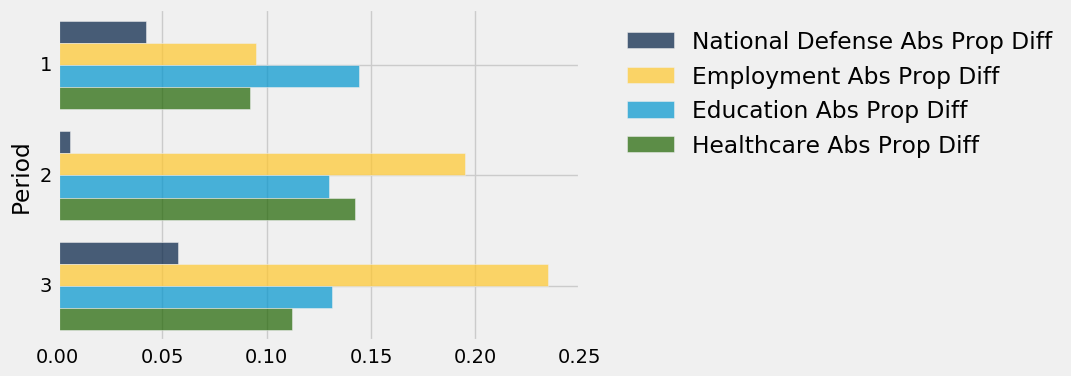

In [126]:
observation_period_table.barh('Period')

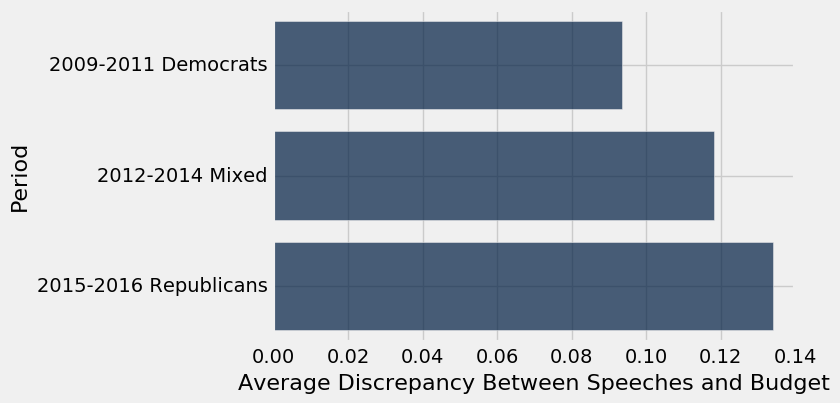

In [127]:
average_abs_prop_diff = []
for i in range(3):
    average_abs_prop_diff = np.append(average_abs_prop_diff, np.average(observation_period_table.drop(0).row(i)))
Table().with_columns(
    'Period', ['2009-2011 Democrats', '2012-2014 Mixed', '2015-2016 Republicans'],
    "Average Discrepancy Between Speeches and Budget", average_abs_prop_diff).barh('Period')